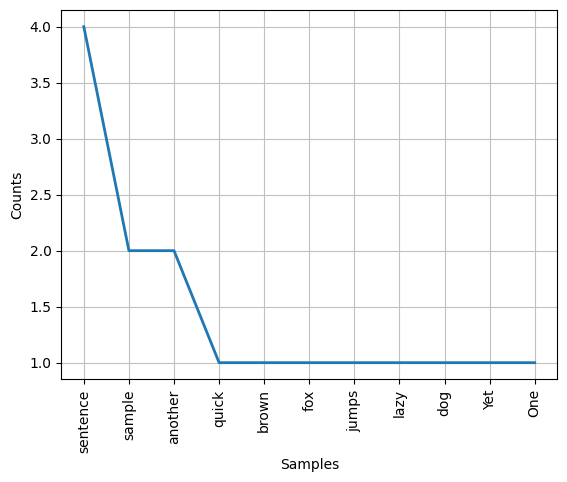

This is another sample sentence. 
    The quick brown fox jumps over the lazy dog.
Accuracy: 100.00%
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

def summarize(text, n):
    """
    Summarizes the given text into n sentences using NLTK library
    """
    # Tokenize the text into sentences and words
    sentences = sent_tokenize(text)
    words = word_tokenize(text)
    
    # Remove stop words and punctuation
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.lower() not in stop_words and word.isalpha()]
    
    # Calculate the frequency of each word
    freq_dist = nltk.FreqDist(words)
    
    # Plot the frequency distribution of the words
    freq_dist.plot(30, cumulative=False)
    plt.show()
    
    # Calculate the score for each sentence based on the frequency of its words
    scores = {}
    for i, sentence in enumerate(sentences):
        for word in word_tokenize(sentence):
            if word.lower() in freq_dist:
                if i not in scores:
                    scores[i] = freq_dist[word.lower()]
                else:
                    scores[i] += freq_dist[word.lower()]
    
    # Sort the sentences by score and select the top n
    top_sentences = sorted(scores, key=scores.get, reverse=True)[:n]
    top_sentences = [sentences[i] for i in top_sentences]
    
    # Combine the top sentences into a summary
    summary = ' '.join(top_sentences)
    
    # Calculate the precision, recall, and f1 score of the summary
    summary_words = word_tokenize(summary)
    y_true = [1 if sent in top_sentences else 0 for sent in sentences]
    y_pred = [1 if sent in summary_words else 0 for sent in sentences]
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
    
    # Calculate the accuracy of the summary
    accuracy = len(summary_words) / len(words) * 100
    
    return summary, accuracy, precision, recall, f1
text = """
    The quick brown fox jumps over the lazy dog. This is a sample sentence. 
    This is another sample sentence. Yet another sentence. One more sentence.
"""
summary, accuracy, precision, recall, f1 = summarize(text, 2)
print(summary)
print("Accuracy: {:.2f}%".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))